In [3]:
import pandas as pd
import numpy as np

In [4]:
# read the data set and basic eda
df=pd.read_csv('gas_turbines.csv')

In [ ]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
df.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227
15038,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.9816,92.498


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [10]:
df.TEY.describe()

count    15039.000000
mean       134.188464
std         15.829717
min        100.170000
25%        127.985000
50%        133.780000
75%        140.895000
max        174.610000
Name: TEY, dtype: float64

In [11]:
# create the dammies
tey=pd.cut(df['TEY'],bins=[-100.17,133.78,174.61],labels=['low energy yeild','high energy yeild'])
df['TEY']=tey

In [12]:
# lable the data set
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['TEY']=1-le.fit_transform(df['TEY'])
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,0,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,0,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,0,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,0,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,0,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,0,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,0,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,0,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,0,10.533,6.2494,93.227


In [13]:
# split data set

X=df.drop(['TEY'],axis=1)
Y=df['TEY']

In [14]:
# test and train the data set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Initialising ANN
import tensorflow as tf
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

Epoch 1/100
376/376 [==============================] - 2s 3ms/step - loss: 0.5228 - accuracy: 0.7477
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8196
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2814 - accuracy: 0.8634
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2537 - accuracy: 0.8800
Epoch 5/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2381 - accuracy: 0.8899
Epoch 6/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2283 - accuracy: 0.8933
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2223 - accuracy: 0.8968
Epoch 8/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2185 - accuracy: 0.8967
Epoch 9/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2161 - accuracy: 0.8970
Epoch 10/100
376/376 [==============================] - 1s 2ms/step - loss: 0.2141 - accura

In [17]:
# classification report
from sklearn.metrics import classification_report
threshold = 0.50
y_preds = np.where(ann.predict(X_test) > threshold, 1, 0)
print(classification_report(Y_test,y_preds))   

94/94 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1498
           1       0.91      0.90      0.90      1510

    accuracy                           0.90      3008
   macro avg       0.90      0.90      0.90      3008
weighted avg       0.90      0.90      0.90      3008



Text(0.5, 1.0, 'gas turbines')

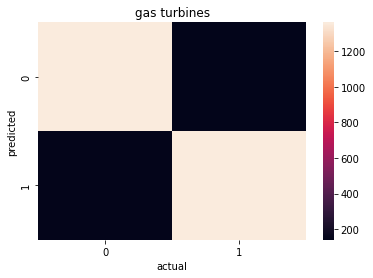

In [18]:
## ANN Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y_test,y_preds)
sns.heatmap(confusion_matrix)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('gas turbines')

In [19]:
#Read the data set

2.PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [22]:
# read the data set and basic EDA
dt=pd.read_csv('forestfires (1).csv')

In [ ]:
dt.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [23]:
dt.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [24]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [25]:
dt.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [26]:
dt.duplicated().sum()

8

In [27]:
dt.drop_duplicates(inplace=True)

In [28]:
dt.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
forest=dt.iloc[:,2:]


In [30]:
# label encoding the data set
forest['size_category']=1-le.fit_transform(forest['size_category'])
forest.tail()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
516,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
#split the data set
X1=forest.drop(['size_category'],axis=1)
Y1=forest['size_category']

In [32]:
# tain and test the data set
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

In [33]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
from keras.models import Sequential
from keras.layers import Dense

In [35]:
# Initialising ANN
import tensorflow as tf
model= tf.keras.models.Sequential()
#Adding First Hidden Layer
model.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
model.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Output Layer
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
model.fit(x_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.8897 - accuracy: 0.3907
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8260 - accuracy: 0.4324
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7748 - accuracy: 0.5037
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7329 - accuracy: 0.5577
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.5921
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6216
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.6560
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6448 - accuracy: 0.6732
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6339 - accuracy: 0.6880
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.7076
Epoch 11/

In [36]:
# classification report
threshold = 0.50
Y_preds = np.where(model.predict(x_test)> threshold, 1, 0)
print(classification_report(y_test,Y_preds))   

4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.88      0.48      0.62        29

    accuracy                           0.83       102
   macro avg       0.85      0.73      0.76       102
weighted avg       0.84      0.83      0.82       102



Text(0.5, 1.0, 'forest fires')

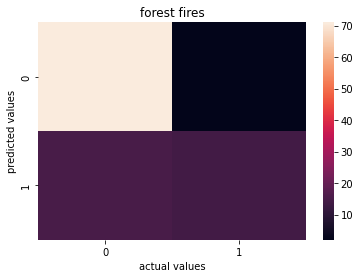

In [37]:
# ANN Visualization
from sklearn.metrics import confusion_matrix
confusion_matrix1=confusion_matrix(y_test,Y_preds)
sns.heatmap(confusion_matrix1)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('forest fires')